In [24]:
# DATA LOADING 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [25]:
#READING THE DATASET
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:

#DATA CLEANING AND PREPROCESSING
count = df['Sex'].value_counts()
print(count)

Sex
male      577
female    314
Name: count, dtype: int64


In [27]:
df.shape

(891, 12)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [30]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.drop(columns=['Cabin'], inplace=True)
df.drop(columns=['Name'], inplace=True)
df.drop(columns=['Ticket'],inplace=True)
df.isnull().sum()


C:\Users\IICET 20\AppData\Local\Temp\ipykernel_12488\2275713392.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\IICET 20\AppData\Local\Temp\ipykernel_12488\2275713392.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

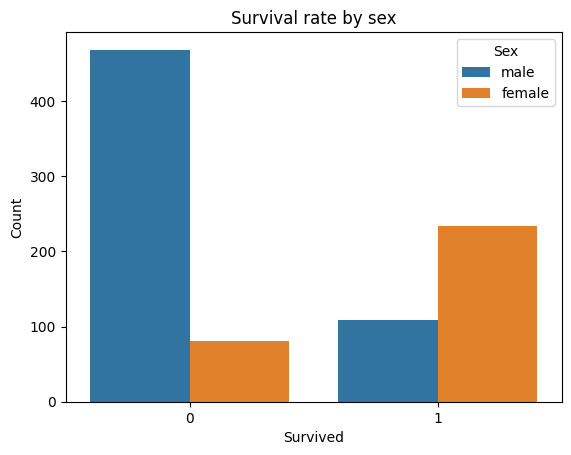

In [33]:
#EXPLORATORY DATA ANALYSIS
sns.countplot(data=df,x='Survived',hue='Sex');
plt.title('Survival rate by sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


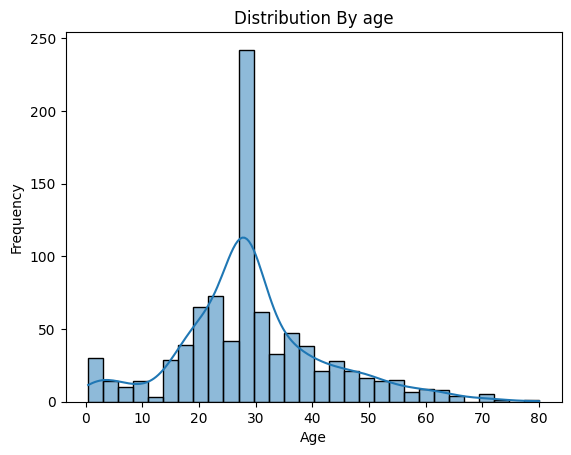

In [34]:
#histogram
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution By age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

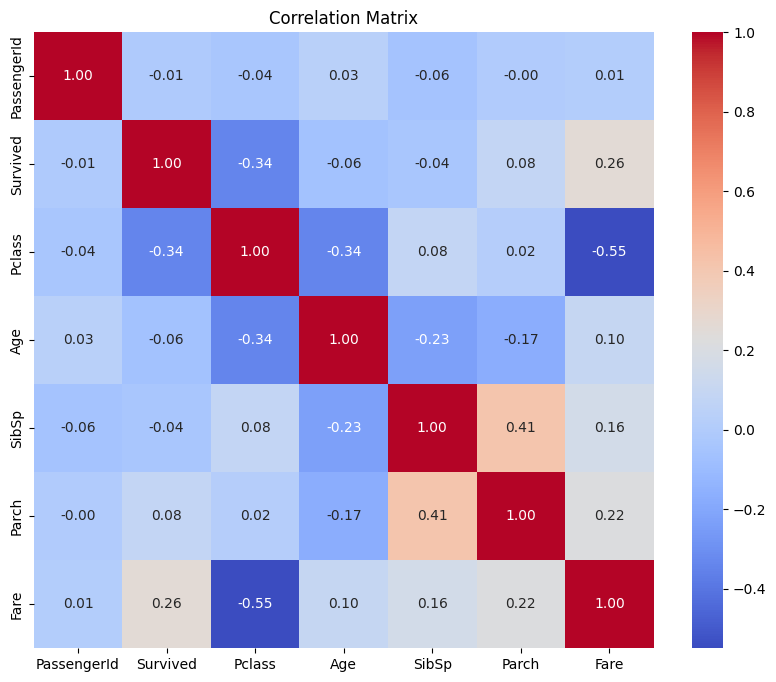

In [35]:
numeric = df.select_dtypes(include=[np.number])
corr_matrix = numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

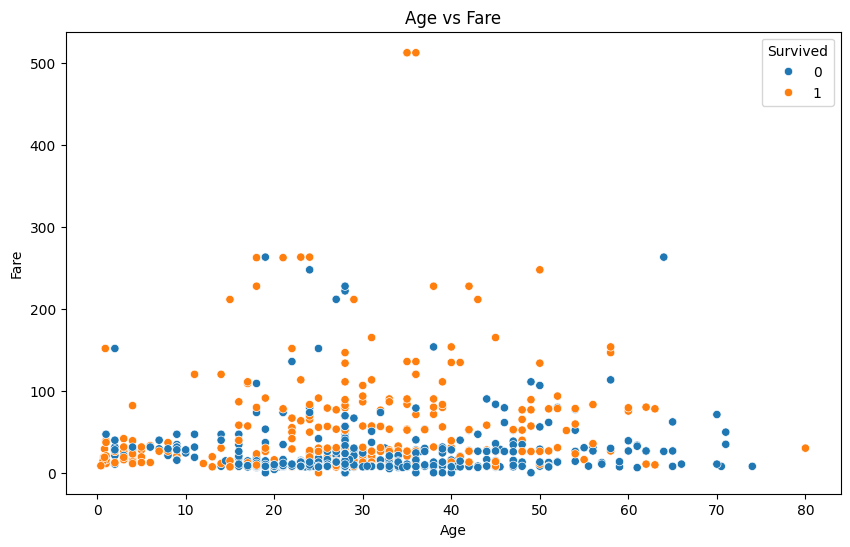

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [37]:
#FEATURE ENGINEERING
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2})
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,2
1,2,1,1,1,38.0,1,0,71.2833,0
2,3,1,3,1,26.0,0,0,7.9250,2
3,4,1,1,1,35.0,1,0,53.1000,2
4,5,0,3,0,35.0,0,0,8.0500,2


In [38]:
import pickle
X=df.drop('Survived',axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
    
print("Scaler saved as 'scaler.pkl'")

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)


Scaler saved as 'scaler.pkl'


In [39]:
log_reg=LogisticRegressionCV()
log_reg.fit(X_train,y_train)
y_pred_log_reg=log_reg.predict(X_test)
accuracy_log_reg=accuracy_score(y_test,y_pred_log_reg)
conf_matrix_log_reg=confusion_matrix(y_test,y_pred_log_reg)
class_report_log_reg=classification_report(y_test,y_pred_log_reg)
print(f'Logistic Regression Accuracy:{accuracy_log_reg:.2f}')
print('Confusion Matrix:')
print(conf_matrix_log_reg)
print('classification report:')
print(class_report_log_reg)

Logistic Regression Accuracy:0.79
Confusion Matrix:
[[89 16]
 [21 53]]
classification report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [40]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
y_pred_tree=tree_clf.predict(X_test)
accuracy_tree=accuracy_score(y_test,y_pred_tree)
conf_matrix_tree=confusion_matrix(y_test,y_pred_tree)
class_report_tree=classification_report(y_test,y_pred_tree)
print(f'Decision Tree accuracy:{accuracy_tree:.2f}')
print('confusion matrix:')
print(conf_matrix_tree)
print('classification report')
print(class_report_tree)

Decision Tree accuracy:0.74
confusion matrix:
[[82 23]
 [23 51]]
classification report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       105
           1       0.69      0.69      0.69        74

    accuracy                           0.74       179
   macro avg       0.74      0.74      0.74       179
weighted avg       0.74      0.74      0.74       179



In [41]:

knn_clf=KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)
y_pred_knn=knn_clf.predict(X_test)
accuracy_knn=accuracy_score(y_test,y_pred_knn)
conf_matrix_knn=confusion_matrix(y_test,y_pred_knn)
class_report_knn=classification_report(y_test,y_pred_knn)
print(f'k-NN Accuracy:{accuracy_knn:.2f}')
print('Confusion Matrix:')
print(conf_matrix_knn)
print('Classification Report')
print(class_report_knn)

k-NN Accuracy:0.81
Confusion Matrix:
[[91 14]
 [20 54]]
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [42]:
from sklearn import svm
clf=svm.SVC(decision_function_shape='ovo')
clf.fit(X_test,y_test) 
y_pred_clf=clf.predict(X_test)
accuracy_clf=accuracy_score(y_test,y_pred_clf)
conf_matrix_clf=confusion_matrix(y_test,y_pred_clf) 
class_report_clf=classification_report(y_test,y_pred_clf)
print(f'SVM:{accuracy_clf:.2f}')
print('Confusion matrix:')
print(conf_matrix_clf)
print('classification_report')
print(class_report_clf)

SVM:0.90
Confusion matrix:
[[98  7]
 [11 63]]
classification_report
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       105
           1       0.90      0.85      0.88        74

    accuracy                           0.90       179
   macro avg       0.90      0.89      0.90       179
weighted avg       0.90      0.90      0.90       179



In [43]:
from sklearn.linear_model import SGDClassifier
classify=SGDClassifier(loss='hinge',penalty='l2',max_iter=5)
classify.fit(X_test,y_test)
y_pred_classify=classify.predict(X_test)
accuracy_classify=accuracy_score(y_test,y_pred_classify)
conf_matrix_classify=confusion_matrix(y_test,y_pred_classify) 
class_report_classify=classification_report(y_test,y_pred_classify)
print(f'SGD:{accuracy_classify:.2f}')
print('Confusion matrix:')
print(conf_matrix_classify)
print('classification_report')
print(class_report_classify)

SGD:0.80
Confusion matrix:
[[85 20]
 [15 59]]
classification_report
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       105
           1       0.75      0.80      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



c:\Users\IICET 20\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [44]:
import pickle
from sklearn.ensemble import RandomForestClassifier
random_clf=RandomForestClassifier(n_estimators=100)
random_clf.fit(X_test,y_test)
y_pred_random=random_clf.predict(X_test)
accuracy_random=accuracy_score(y_test,y_pred_random)
conf_matrix_random=confusion_matrix(y_test,y_pred_random)
class_report_random=classification_report(y_test,y_pred_random)
print(f'Random Forest:{accuracy_random:.2f}')
print('Confusion matrix:')
print(conf_matrix_random)
print('classification_report')
print(class_report_random)

file_name='model.pickle'
pickle.dump(random_clf,open(file_name,'wb'))
loaded_model=pickle.load(open(file_name,'rb'))

Random Forest:1.00
Confusion matrix:
[[105   0]
 [  0  74]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



In [45]:
import pickle
import numpy as np

def infer_titanic_survival(model_path, scaler_path, input_features):
    """
    Perform inferencing on the Titanic dataset.
    
    Parameters:
    - model_path (str): Path to the saved model pickle file.
    - scaler_path (str): Path to the saved scaler pickle file.
    - input_features (list): List of input features in the order:
      [PassengerId, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]
      
    Returns:
    - str: "Survived" or "Not Survived" based on model prediction.
    """
    try:
        # Load the trained model and scaler
        with open(r'C:\Users\IICET 20\Desktop\Simra kazi\Machine Learning\Titanic Project\model.pickle', 'rb') as model_file:
            model = pickle.load(model_file)
        
        with open(r'C:\Users\IICET 20\Desktop\Simra kazi\Machine Learning\Titanic Project\scaler.pkl', 'rb') as scaler_file:
            scaler = pickle.load(scaler_file)
        
        # Ensure the input features are in the correct format
        input_array = np.array([input_features]).reshape(1, -1)
        
        # Scale the input features
        scaled_input = scaler.transform(input_array)
        
        # Predict survival
        prediction = model.predict(scaled_input)
        
        # Return result
        return "Survived" if prediction[0] == 1 else "Not Survived"
    
    except Exception as e:
        return f"An error occurred: {e}"


    


In [46]:
#  - input_features (list): List of input features in the following order:
      
#         - PassengerId (int): Unique ID of the passenger.
#         - Pclass (int): Passenger class (1 = First, 2 = Second, 3 = Third).
#         - Sex (int): Gender of the passenger (0 = Male, 1 = Female).
#         - Age (float): Age of the passenger.
#         - SibSp (int): Number of siblings/spouses aboard the Titanic.
#         - Parch (int): Number of parents/children aboard the Titanic.
#         - Fare (float): Ticket fare paid by the passenger.
#         - Embarked (int): Port of embarkation (0 = Cherbourg, 1 = Queenstown, 2 = Southampton).

# Example input: PassengerId=1, Pclass=3, Sex=0 (male), Age=22.0, SibSp=1, Parch=0, Fare=7.25, Embarked=2 (Southampton)
input_features = [1, 3, 1, 22.0, 1, 0, 7.2500, 0]

# Path to your saved model and scaler files
model_path = 'titanic_model.pkl'
scaler_path = 'scaler.pkl'

# Infer survival
result = infer_titanic_survival(model_path, scaler_path, input_features)
print(result)

Survived


c:\Users\IICET 20\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
